<a href="https://colab.research.google.com/github/annacarolss/ProjetoRegressaoML/blob/main/ProjetoRegressaoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,mean_squared_error, r2_score, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import seaborn as sns
sns.set(style='whitegrid')

In [141]:
dados_df = pd.read_csv('/content/drive/MyDrive/Instagram-Restic/top_insta_influencers_data.csv')
dados_df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


## Tratamento dos dados

In [142]:
dados_df.rename(columns={
    'rank': 'Classificação',
    'channel_info': 'Nome',
    'influence_score': 'Pontuação',
    'posts': 'Postagens',
    'followers': 'Seguidores',
    'avg_likes': 'Media_Curtidas',
    '60_day_eng_rate': 'Taxa_Engajamento',
    'new_post_avg_like': 'Media_Curtidas_Novas',
    'total_likes': 'Likes',
    'country': 'País'}, inplace=True)

print(dados_df.columns)

Index(['Classificação', 'Nome', 'Pontuação', 'Postagens', 'Seguidores',
       'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes',
       'País'],
      dtype='object')


In [143]:
dados_df.head()

,Classificação,Nome,Pontuação,Postagens,Seguidores,Media_Curtidas,Taxa_Engajamento,Media_Curtidas_Novas,Likes,País
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [144]:
# Função para converter valores como 'k', 'm', 'b', '%' para números reais
def convert_to_numeric(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace('m', '')) * 1_000_000
        elif 'k' in value:
            return float(value.replace('k', '')) * 1_000
        elif 'b' in value:
            return float(value.replace('b', '')) * 1_000_000_000
        elif '%' in value:
            return float(value.replace('%', '')) / 100
    return value

# Aplicar a conversão em colunas relevantes
colunas_para_converter = ['Postagens', 'Seguidores', 'Media_Curtidas', 'Taxa_Engajamento', 'Media_Curtidas_Novas', 'Likes']
for coluna in colunas_para_converter:
    if coluna in dados_df.columns:
        dados_df[coluna] = dados_df[coluna].apply(convert_to_numeric)

print(dados_df.head())

   Classificação         Nome  Pontuação  Postagens   Seguidores  \
0              1    cristiano         92     3300.0  475800000.0   
1              2  kyliejenner         91     6900.0  366200000.0   
2              3     leomessi         90      890.0  357300000.0   
3              4  selenagomez         93     1800.0  342700000.0   
4              5      therock         91     6800.0  334100000.0   

   Media_Curtidas  Taxa_Engajamento Media_Curtidas_Novas         Likes  \
0       8700000.0            0.0139            6500000.0  2.900000e+10   
1       8300000.0            0.0162            5900000.0  5.740000e+10   
2       6800000.0            0.0124            4400000.0  6.000000e+09   
3       6200000.0            0.0097            3300000.0  1.150000e+10   
4       1900000.0            0.0020             665300.0  1.250000e+10   

            País  
0          Spain  
1  United States  
2            NaN  
3  United States  
4  United States  


In [146]:
# Verificar valores ausentes
print("Valores ausentes por coluna:")
print(dados_df.isna().sum())

# Tratar valores ausentes (remoção ou substituição)
dados_df.dropna(subset=['Taxa_Engajamento', 'Seguidores'], inplace=True)

# Exibir informações após tratar valores ausentes
print(dados_df.info())

Valores ausentes por coluna:
Classificação            0
Nome                     0
Pontuação                0
Postagens                0
Seguidores               0
Media_Curtidas           0
Taxa_Engajamento         0
Media_Curtidas_Novas     0
Likes                    0
País                    61
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Classificação         199 non-null    int64  
 1   Nome                  199 non-null    object 
 2   Pontuação             199 non-null    int64  
 3   Postagens             199 non-null    float64
 4   Seguidores            199 non-null    float64
 5   Media_Curtidas        199 non-null    float64
 6   Taxa_Engajamento      199 non-null    float64
 7   Media_Curtidas_Novas  199 non-null    object 
 8   Likes                 199 non-null    float64
 9   País                  

## Análises exploratórias

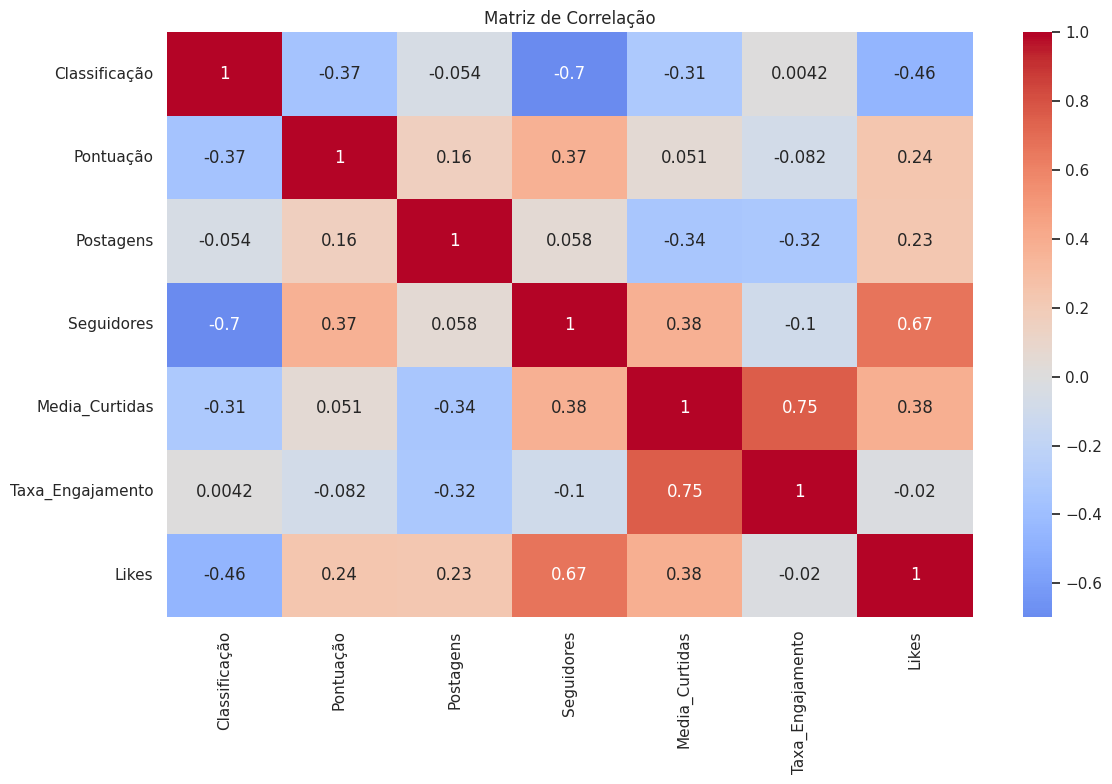

In [147]:
plt.figure(figsize=(12, 8))
correlation_matrix = dados_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

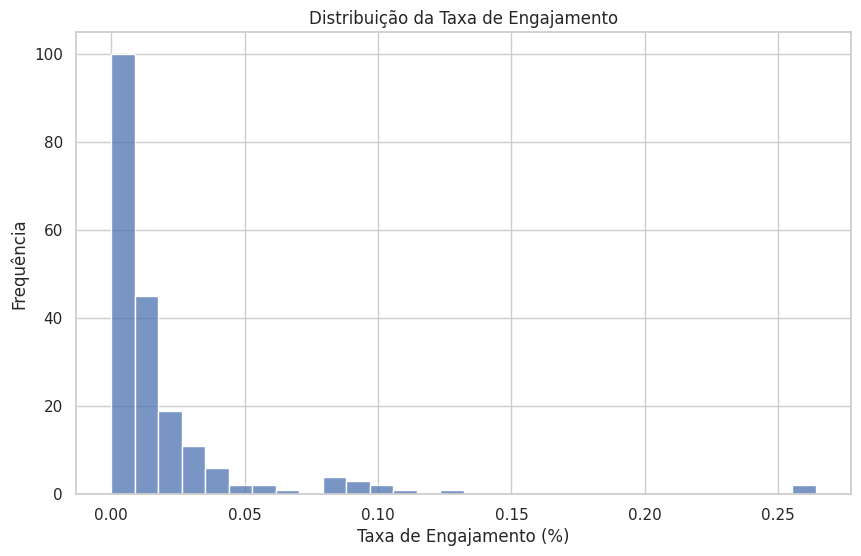

In [148]:
# Distribuição da Taxa de Engajamento
plt.figure(figsize=(10, 6))
sns.histplot(dados_df['Taxa_Engajamento'], bins=30)
plt.title('Distribuição da Taxa de Engajamento')
plt.xlabel('Taxa de Engajamento (%)')
plt.ylabel('Frequência')
plt.show()

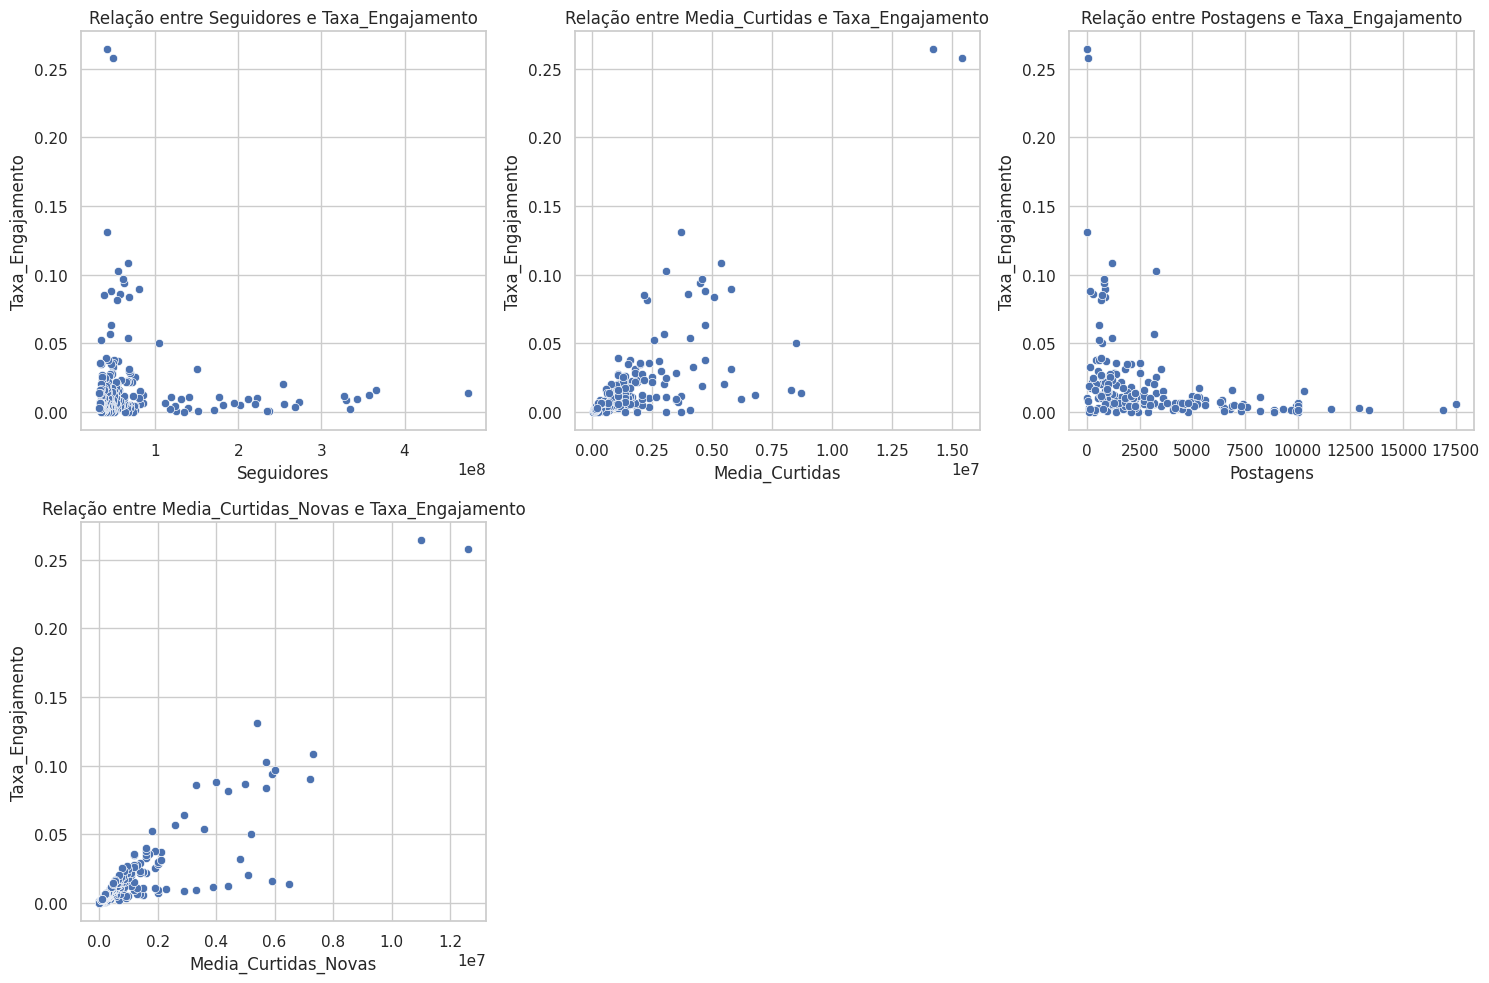

In [151]:
#Relação Seguidores, média curtidas, postagens, media curtidas novas
columns_to_plot = ['Seguidores', 'Media_Curtidas','Postagens','Media_Curtidas_Novas','Taxa_Engajamento']
dados_df_selected = dados_df[columns_to_plot].dropna()


plt.figure(figsize=(15, 10))
for i, column in enumerate(dados_df_selected.columns[:-1], 1):
    plt.subplot(2, 3, i)  # Ajuste o layout conforme necessário
    sns.scatterplot(data=dados_df_selected, x=column, y='Taxa_Engajamento')
    plt.title(f'Relação entre {column} e Taxa_Engajamento')
    plt.xlabel(column)
    plt.ylabel('Taxa_Engajamento')

plt.tight_layout()
plt.show()

## Divisão de dados

In [152]:
X_dados = dados_df[['Seguidores', 'Media_Curtidas', 'Postagens', 'Media_Curtidas_Novas']]
y_dados = dados_df['Taxa_Engajamento']

# Dividir os dados em treino e teste
X_train_dados, X_test_dados, y_train_dados, y_test_dados = train_test_split(X_dados, y_dados, test_size=0.2, random_state=42)

In [153]:
# Remover valores ausentes da variável dependente
dados_df = dados_df.dropna(subset=['Taxa_Engajamento'])

# Confirmar que não há valores NaN
print("Valores ausentes em Taxa_Engajamento:", dados_df['Taxa_Engajamento'].isna().sum())

Valores ausentes em Taxa_Engajamento: 0


In [154]:
X_dados = dados_df[['Seguidores', 'Media_Curtidas', 'Postagens', 'Media_Curtidas_Novas']]
y_dados = dados_df['Taxa_Engajamento']

# Dividir os dados em treino e teste
X_train_dados, X_test_dados, y_train_dados, y_test_dados = train_test_split(X_dados, y_dados, test_size=0.2, random_state=42)

In [155]:
# Verificar se há valores ausentes em X_train, X_test, y_train, y_test
print("Valores ausentes em X_train:", X_train_dados.isna().sum().sum())
print("Valores ausentes em y_train:", y_train_dados.isna().sum())

Valores ausentes em X_train: 0
Valores ausentes em y_train: 0


## Treinamento do modelo

In [156]:
# Criando e treinar o modelo
model = LinearRegression()

model.fit(X_train_dados, y_train_dados)

LinearRegression()

## Avaliação do modelo

Mean Squared Error (MSE): 0.01
Erro Absoluto Médio (MAE): 0.00
Coeficiente de Determinação (R²): 0.95


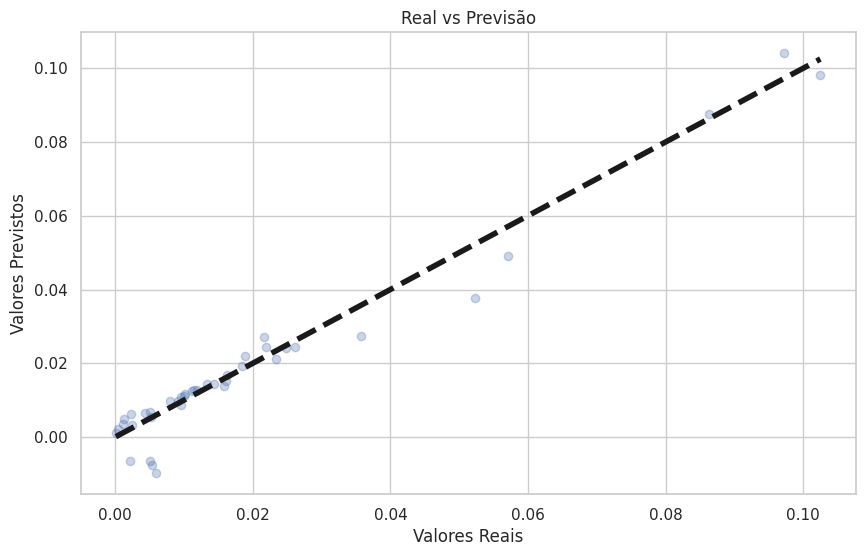

In [158]:
y_pred_dados = model.predict(X_test_dados)
mse_dados = mean_squared_error(y_test_dados, y_pred_dados)
mae_dados = mean_absolute_error(y_test_dados, y_pred_dados)
r2_dados = r2_score(y_test_dados, y_pred_dados)

print(f'Mean Squared Error (MSE): {mse_dados ** 0.5:.2f}')
print(f'Erro Absoluto Médio (MAE): {mae_dados:.2f}')
print(f'Coeficiente de Determinação (R²): {r2_dados:.2f}')

# Visualizar os resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test_dados, y_pred_dados, alpha=0.3)
plt.plot([y_test_dados.min(), y_test_dados.max()], [y_test_dados.min(), y_test_dados.max()], 'k--', lw=4)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Real vs Previsão')
plt.show()

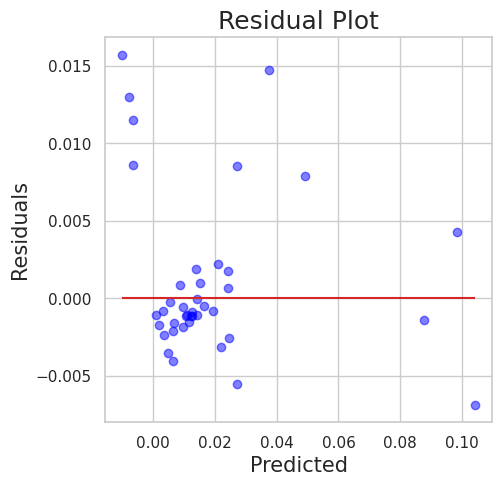

In [159]:
residuals = y_test_dados - y_pred_dados
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(y_pred_dados, residuals, alpha=0.5, color='blue')
ax.hlines(0, xmin=y_pred_dados.min(), xmax=y_pred_dados.max(), color='tab:red')  # Linha horizontal em y=0

plt.xlabel('Predicted', size=15)
plt.ylabel('Residuals', size=15)
plt.title('Residual Plot', size=18)
plt.grid(True)
plt.show()

In [161]:
import joblib
joblib.dump(model, 'regression_model.pkl')

['regression_model.pkl']

In [163]:
# Exibir os coeficientes do modelo com os nomes das variáveis
coef_df = pd.DataFrame({
    'Variável': X_dados.columns,
    'Coeficiente': model.coef_
})

print(coef_df)

print("Intercepto do Modelo:", model.intercept_)

               Variável   Coeficiente
0            Seguidores -1.893627e-10
1        Media_Curtidas  1.409555e-09
2             Postagens -5.051564e-09
3  Media_Curtidas_Novas  1.634534e-08
Intercepto do Modelo: 0.011211311631619881


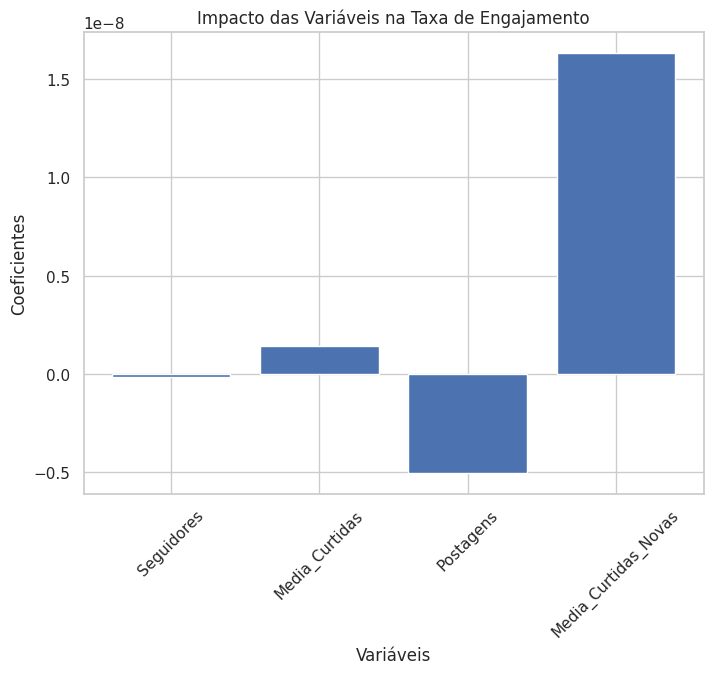

In [164]:
# Gráfico de barras para os coeficientes
plt.figure(figsize=(8, 6))
plt.bar(coef_df['Variável'], coef_df['Coeficiente'])
plt.title('Impacto das Variáveis na Taxa de Engajamento')
plt.xlabel('Variáveis')
plt.ylabel('Coeficientes')
plt.xticks(rotation=45)
plt.show()

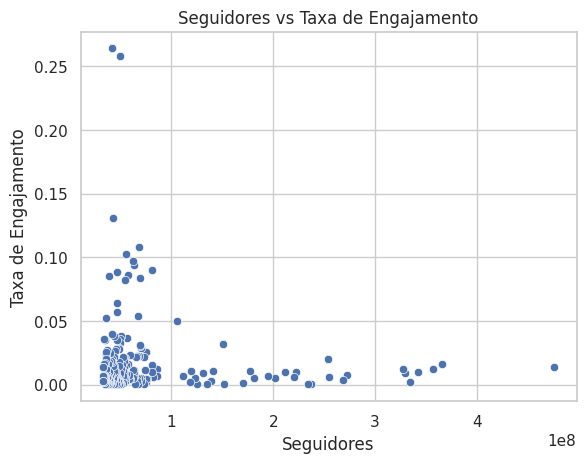

In [165]:
sns.scatterplot(data=dados_df, x='Seguidores', y='Taxa_Engajamento')
plt.title('Seguidores vs Taxa de Engajamento')
plt.xlabel('Seguidores')
plt.ylabel('Taxa de Engajamento')
plt.show()